In [2]:
import torch
import numpy as np
import math
import matplotlib.pyplot as plt
import IPython.display as ipd
import soundfile as sf

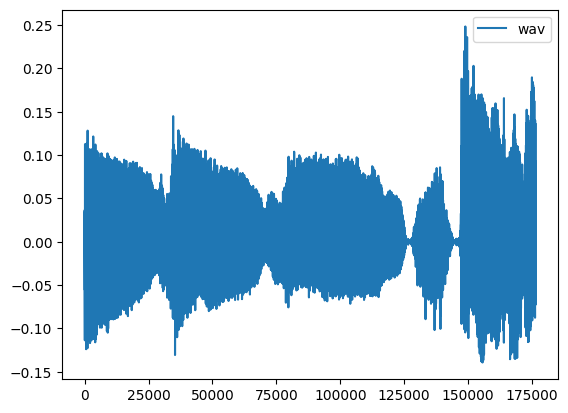

In [3]:
AUDIO_PATH = '/home/yytung/projects/MixingSecrets/dataset/Plums/raw_tracks/06_LeadVox.wav'
wav, sr = sf.read(AUDIO_PATH)
wav = wav[sr*15:sr*19]
ipd.display(ipd.Audio(data=wav, rate=sr, normalize=False))
plt.figure(dpi=100)
plt.plot(wav,      label='wav')
plt.legend()

## Tanh

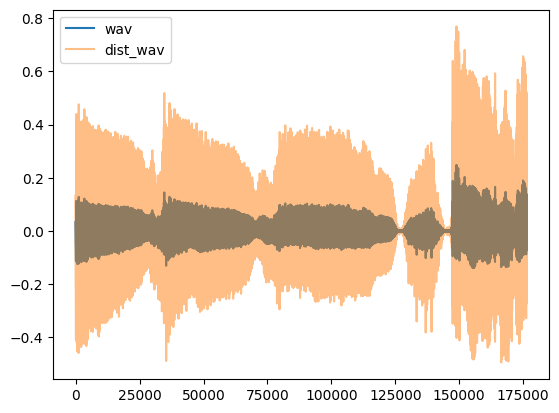

In [16]:
from diffFx_pytorch.processors.distortion import TanHDist
DIST_DSP_PARAMS = {
    'mix': 1.0, 
    'pre_gain_db': 12.0, 
    'post_gain_db': 0.0, 
    'dc_bias': 0.0,
}

Processor = TanHDist(sample_rate=sr, shaping_mode=True).to('cuda')
test_wav = torch.from_numpy(wav).unsqueeze(0).unsqueeze(0).float().to('cuda')
dist_wav = Processor(test_wav, None, DIST_DSP_PARAMS)

ipd.display(ipd.Audio(data=wav, rate=sr, normalize=False))
ipd.display(ipd.Audio(data=dist_wav.squeeze().cpu().numpy(), rate=sr, normalize=False))

plt.figure(dpi=100)
plt.plot(wav,      label='wav')
plt.plot(dist_wav.squeeze().cpu().numpy(),   alpha=0.5,   label='dist_wav')
plt.legend()

## Soft

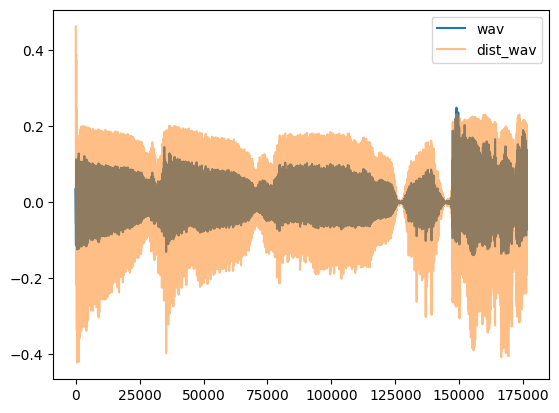

In [19]:
from diffFx_pytorch.processors.distortion import SoftDist
DIST_DSP_PARAMS = {
    'mix': 1.0, 
    'pre_gain_db': 12.0, 
    'post_gain_db': -5.0, 
    'dc_bias': 0.5,
}

Processor = SoftDist(sample_rate=sr, shaping_mode=True).to('cuda')
test_wav = torch.from_numpy(wav).unsqueeze(0).unsqueeze(0).float().to('cuda')
dist_wav = Processor(test_wav, None, DIST_DSP_PARAMS)

ipd.display(ipd.Audio(data=wav, rate=sr, normalize=False))
ipd.display(ipd.Audio(data=dist_wav.squeeze().cpu().numpy(), rate=sr, normalize=False))

plt.figure(dpi=100)
plt.plot(wav,      label='wav')
plt.plot(dist_wav.squeeze().cpu().numpy(),   alpha=0.5,   label='dist_wav')
plt.legend()xw